<a href="https://colab.research.google.com/github/szh141/mlproject/blob/main/Ml_training_on_PCA_data_vs_full_data_20240724.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://medium.com/@nimritakoul01/principal-component-analysis-simply-explained-9ce6570813ef

In [9]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
X= iris.data
y=iris.target

In [26]:
print(X.dtype)

print(y)

float64
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [11]:

df = pd.DataFrame(X, columns = ['sepal length','sepal width','petal length','petal width'])
df['species']= y
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)

In [30]:
x_pca[:,0][y == 2]

array([2.53119273, 1.41523588, 2.61667602, 1.97153105, 2.35000592,
       3.39703874, 0.52123224, 2.93258707, 2.32122882, 2.91675097,
       1.66177415, 1.80340195, 2.1655918 , 1.34616358, 1.58592822,
       1.90445637, 1.94968906, 3.48705536, 3.79564542, 1.30079171,
       2.42781791, 1.19900111, 3.49992004, 1.38876613, 2.2754305 ,
       2.61409047, 1.25850816, 1.29113206, 2.12360872, 2.38800302,
       2.84167278, 3.23067366, 2.15943764, 1.44416124, 1.78129481,
       3.07649993, 2.14424331, 1.90509815, 1.16932634, 2.10761114,
       2.31415471, 1.9222678 , 1.41523588, 2.56301338, 2.41874618,
       1.94410979, 1.52716661, 1.76434572, 1.90094161, 1.39018886])

In [21]:
x_pca.shape

(150, 2)

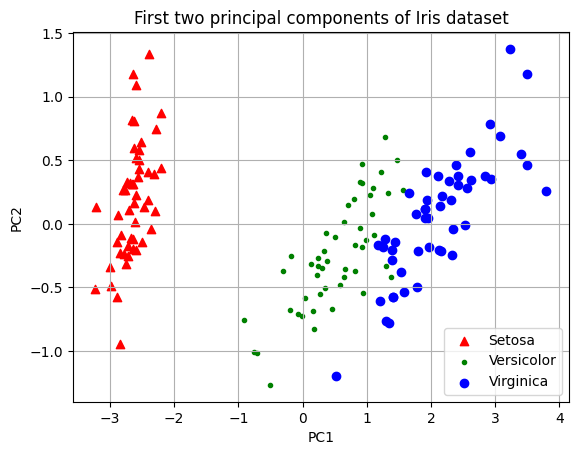

In [22]:
import matplotlib.pyplot as plt

speciesnames = {0: 'Setosa', 1: 'Versicolor', 2:'Virginica'}

for label,marker,color in zip(range(0,3),('^', '.', 'o'),('red', 'green', 'blue')):
    plt.scatter(x=x_pca[:,0][y == label], y=x_pca[:,1][y == label], marker=marker, color=color,label=speciesnames[label])
    #plt.scatter(x=x_pca[:,0], y=x_pca[:,1], marker=marker, color=color,label=speciesnames[label])

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('First two principal components of Iris dataset')
plt.tight_layout
plt.grid()
plt.show()

Using Decision Tree, compare training accuracy using full dataset vs two PCA components

In [23]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.96

In [24]:
#Now use only two principal components for classification

Xpca_train, Xpca_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.33, random_state=42)
clf = DecisionTreeClassifier(random_state=0)
clf.fit(Xpca_train, y_train)
y_pred = clf.predict(Xpca_test)
accuracy_score(y_test, y_pred)

0.98